# Chofifah Fitrotul Hasanah
chofifahfitrotulhasanah@gmail.com

In [19]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [20]:
df = pd.read_csv('/content/train.csv')
df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [21]:
category = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='sentiment')
df_baru


,text,neg,pos
0,"Now, I won't deny that when I purchased this o...",1,0
1,"The saddest thing about this ""tribute"" is that...",1,0
2,Last night I decided to watch the prequel or s...,1,0
3,I have to admit that i liked the first half of...,1,0
4,I was not impressed about this film especially...,1,0
...,...,...,...
24995,"This film is fun, if your a person who likes a...",0,1
24996,After seeing this film I feel like I know just...,0,1
24997,first this deserves about 5 stars due to actin...,1,0
24998,If you like films that ramble with little plot...,1,0


In [22]:
from collections import Counter

def wordCount(text):
  count = Counter()
  for i in text.values :
    for word in i.split():
      count[word] += 1
  return count

text = df.text
counter = wordCount(text)

num_word = len(counter)
print(num_word)

280617


In [23]:
sentiment = df_baru['text'].values
label = df_baru[['neg', 'pos']].values

In [24]:
from sklearn.model_selection import train_test_split
sentiment_latih, sentiment_test, label_latih, label_test = train_test_split(sentiment, label, test_size=0.2) #80% untuk training dan 20% untuk testing

In [25]:
# mengubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=280617, oov_token='x')
tokenizer.fit_on_texts(sentiment_latih)

sekuens_latih = tokenizer.texts_to_sequences(sentiment_latih)
sekuens_test = tokenizer.texts_to_sequences(sentiment_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

padded_latih.shape

(20000, 1850)

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential([
    tf.keras.layers.Embedding(input_dim=280617, output_dim=16),
    tf.keras.layers.LSTM(64),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          4489872   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,527,314
Trainable params: 4,527,314
Non-trainable params: 0
______________________________________________

In [32]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy', #terdapat 2 kelas
    metrics=['accuracy'])

In [33]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='my_best_model.hdf5', 
    monitor='val_accuracy',
    verbose=1, 
    save_best_only=True,
    save_weights_only=False,
    mode='auto')

In [34]:
history = model.fit(padded_latih, label_latih, epochs=10, validation_data=(padded_test, label_test), callbacks=[checkpoint])

Epoch 1/10
625/625 [==============================] - 430s 686ms/step - loss: 0.1635 - accuracy: 0.9416 - val_loss: 0.2866 - val_accuracy: 0.8884

Epoch 00001: val_accuracy improved from -inf to 0.88840, saving model to my_best_model.hdf5
Epoch 2/10
625/625 [==============================] - 429s 687ms/step - loss: 0.1418 - accuracy: 0.9510 - val_loss: 0.3264 - val_accuracy: 0.8738

Epoch 00002: val_accuracy did not improve from 0.88840
Epoch 3/10
625/625 [==============================] - 429s 687ms/step - loss: 0.1239 - accuracy: 0.9585 - val_loss: 0.2902 - val_accuracy: 0.8906

Epoch 00003: val_accuracy improved from 0.88840 to 0.89060, saving model to my_best_model.hdf5
Epoch 4/10
625/625 [==============================] - 432s 692ms/step - loss: 0.1124 - accuracy: 0.9645 - val_loss: 0.3006 - val_accuracy: 0.8868

Epoch 00004: val_accuracy did not improve from 0.89060
Epoch 5/10
625/625 [==============================] - 429s 687ms/step - loss: 0.1001 - accuracy: 0.9679 - val_loss:

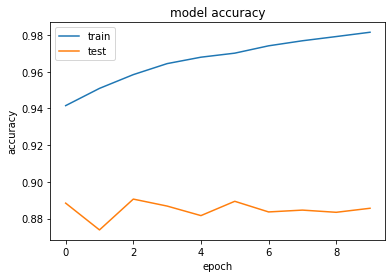

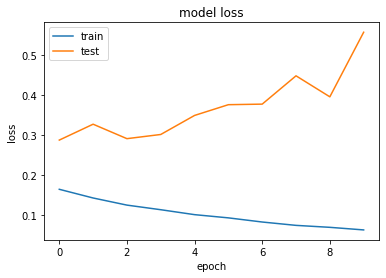

In [35]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
#Plot akurasi dan loss data

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()